In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Quality of Service 5G.csv')

In [4]:
df.head(5)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [5]:
df.tail(5)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
399,9/3/2023 10:06,User_400,Web_Browsing,-113 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%


In [6]:
df.shape

(400, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [8]:
df.dtypes

Timestamp              object
User_ID                object
Application_Type       object
Signal_Strength        object
Latency                object
Required_Bandwidth     object
Allocated_Bandwidth    object
Resource_Allocation    object
dtype: object

In [9]:
df.isnull().any()

Timestamp              False
User_ID                False
Application_Type       False
Signal_Strength        False
Latency                False
Required_Bandwidth     False
Allocated_Bandwidth    False
Resource_Allocation    False
dtype: bool

In [10]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [11]:
df.Application_Type.value_counts()

Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: Application_Type, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = list(df.select_dtypes(include=['object']).columns)
for column in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[column])
    df[column] = encoder.transform(df[column])
df.to_csv('transformed_dataset.csv', index=False)

In [13]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,0,0,6,59,31,23,66,4
1,0,111,9,64,20,30,37,6
2,0,222,5,69,42,140,165,5
3,0,333,1,54,2,11,16,8
4,0,345,4,62,25,84,99,7


In [14]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,3.000000,199.500000,5.092500,46.645000,38.972500,73.68000,80.432500,4.942500
std,1.938917,115.614301,3.128644,25.688201,18.121609,57.64086,58.729151,1.796458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,99.750000,3.000000,27.750000,26.000000,13.00000,17.750000,4.000000
50%,3.000000,199.500000,5.500000,51.000000,37.000000,79.00000,86.500000,4.000000
75%,5.000000,299.250000,7.000000,69.000000,52.000000,118.00000,123.250000,6.000000
max,6.000000,399.000000,10.000000,83.000000,86.000000,187.00000,193.000000,8.000000


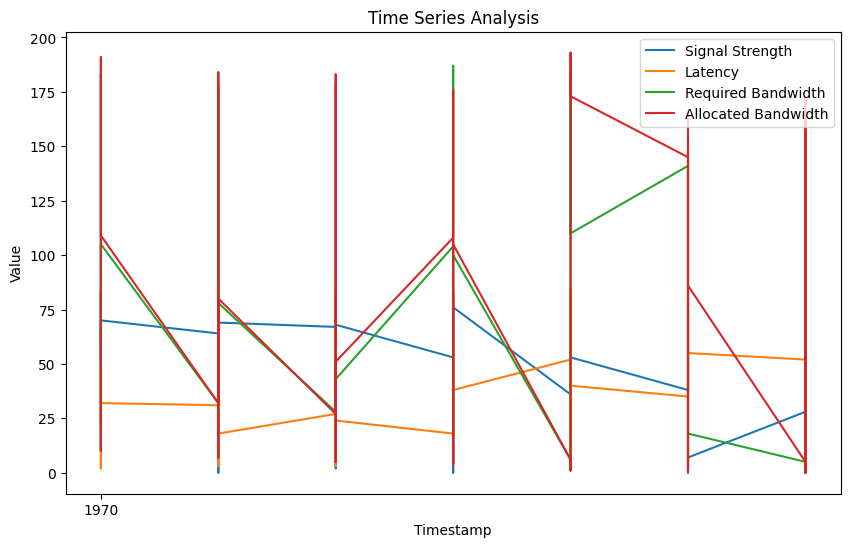

In [15]:
import matplotlib.pyplot as plt
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Signal_Strength'], label='Signal Strength')
plt.plot(df['Timestamp'], df['Latency'], label='Latency')
plt.plot(df['Timestamp'], df['Required_Bandwidth'], label='Required Bandwidth')
plt.plot(df['Timestamp'], df['Allocated_Bandwidth'], label='Allocated Bandwidth')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Analysis')
plt.show()

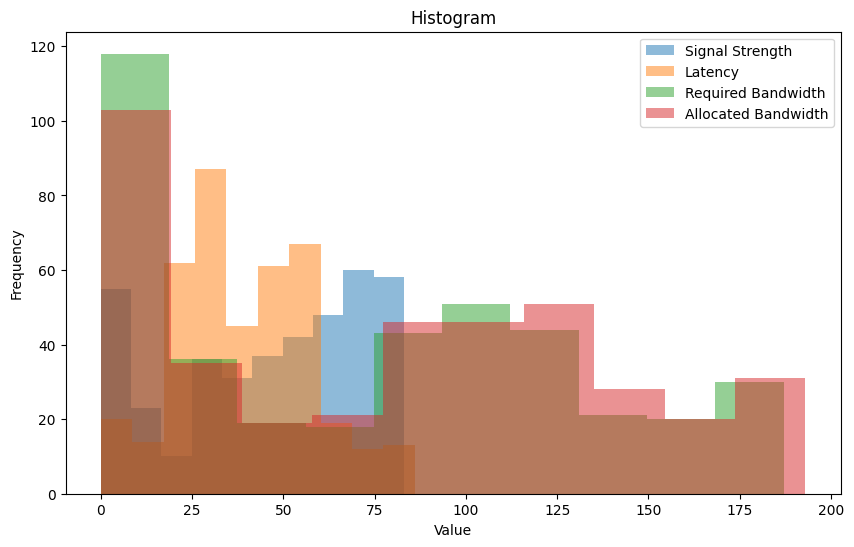

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Signal_Strength'], bins=10, alpha=0.5, label='Signal Strength')
plt.hist(df['Latency'], bins=10, alpha=0.5, label='Latency')
plt.hist(df['Required_Bandwidth'], bins=10, alpha=0.5, label='Required Bandwidth')
plt.hist(df['Allocated_Bandwidth'], bins=10, alpha=0.5, label='Allocated Bandwidth')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram')
plt.show()

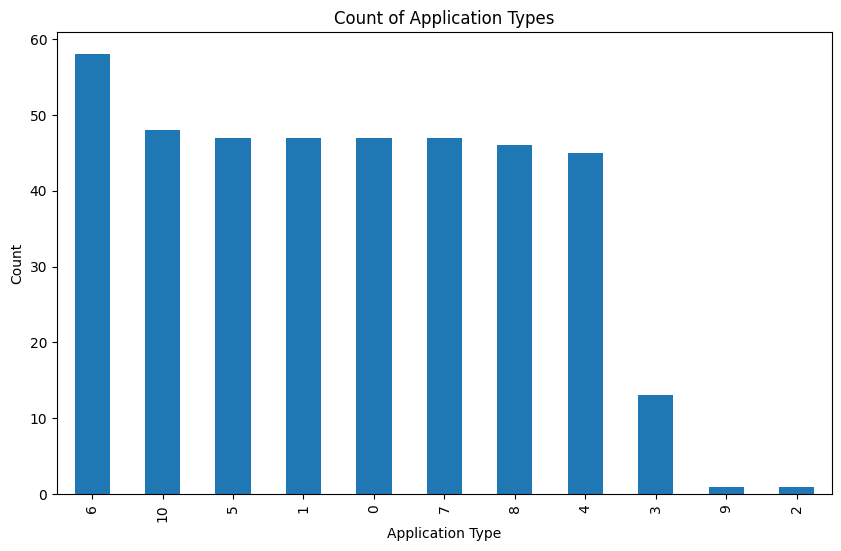

In [17]:
plt.figure(figsize=(10, 6))
df['Application_Type'].value_counts().plot(kind='bar')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('Count of Application Types')
plt.show()

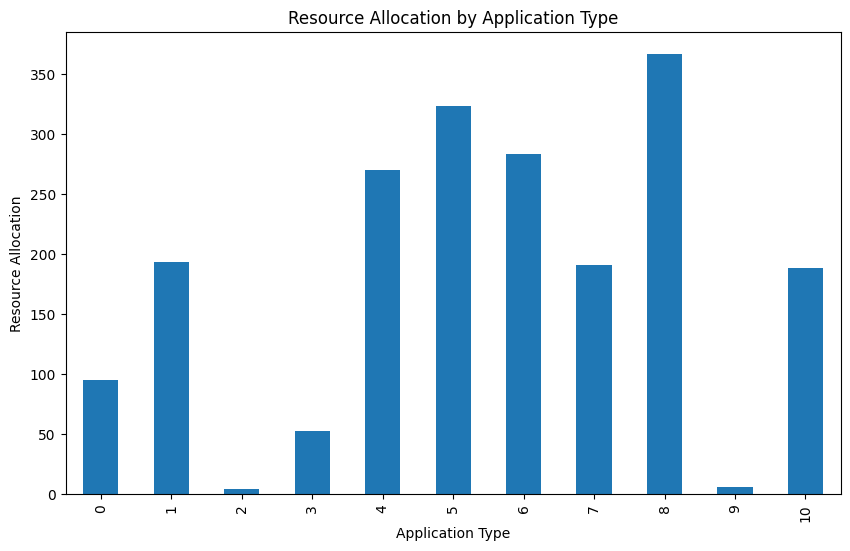

In [18]:
plt.figure(figsize=(10, 6))
df.groupby('Application_Type')['Resource_Allocation'].sum().plot(kind='bar', stacked=True)
plt.xlabel('Application Type')
plt.ylabel('Resource Allocation')
plt.title('Resource Allocation by Application Type')
plt.show()

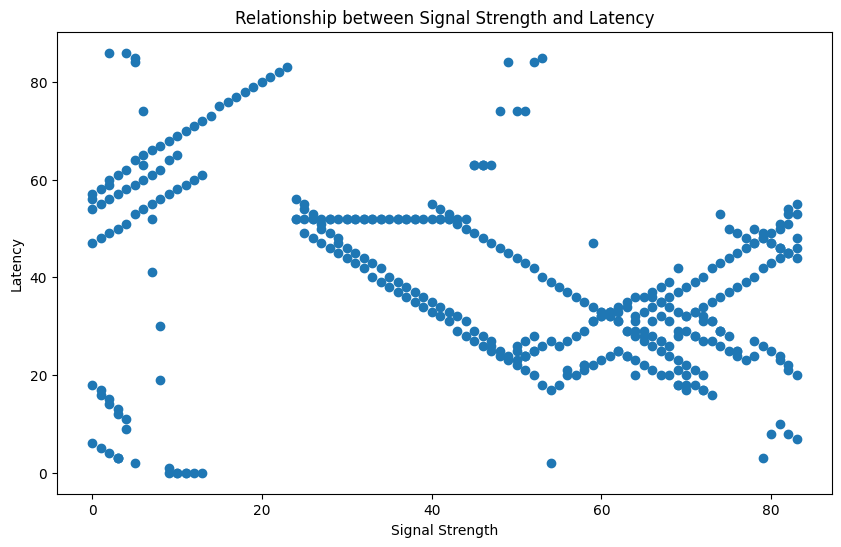

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Signal_Strength'], df['Latency'])
plt.xlabel('Signal Strength')
plt.ylabel('Latency')
plt.title('Relationship between Signal Strength and Latency')
plt.show()

<Figure size 1000x600 with 0 Axes>

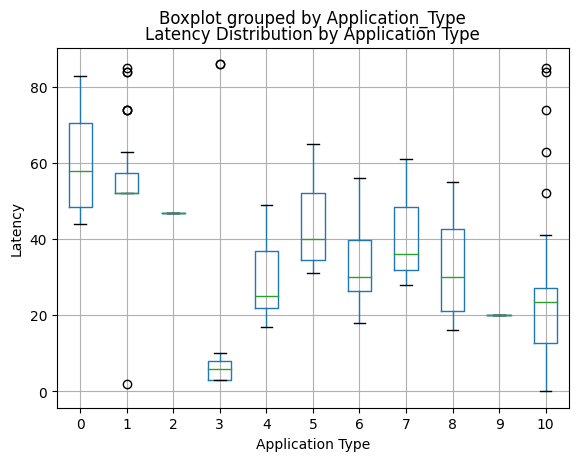

In [20]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Latency', by='Application_Type')
plt.xlabel('Application Type')
plt.ylabel('Latency')
plt.title('Latency Distribution by Application Type')
plt.show()

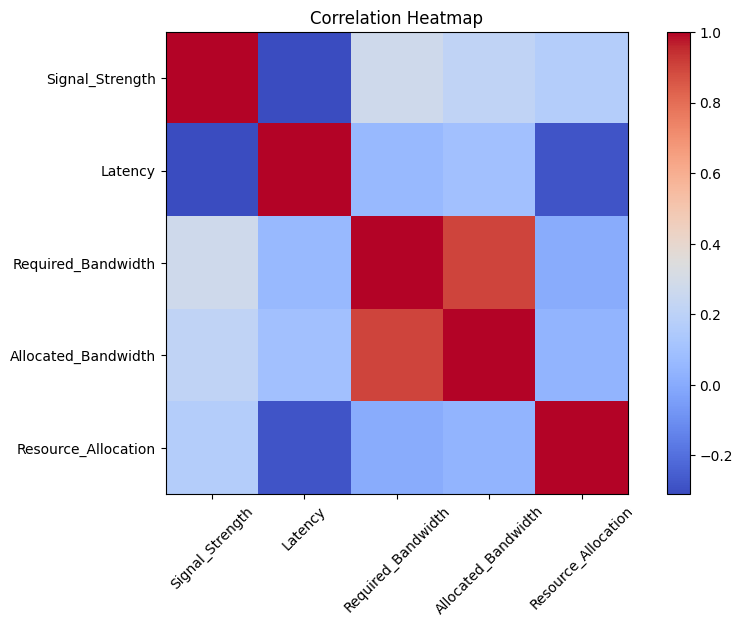

In [21]:
corr_matrix = df[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']].corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:-1]
y = df.Resource_Allocation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.head()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
3,1,54,2,11,16
18,3,80,8,183,191
202,4,49,23,108,120
250,4,43,29,122,126
274,4,40,33,125,143


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Regressor MSE:", rf_mse)

Random Forest Regressor MSE: 0.2805937500000001


In [25]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regressor MSE:", linear_mse)

Linear Regressor MSE: 2.8677200653654302


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.9125


In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Classifier Accuracy:", svm_accuracy)

SVM Classifier Accuracy: 0.8375


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.8625


In [29]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.7875


In [30]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,rf_predictions)
acc

0.9199411528687976

In [31]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,dt_predictions)
acc

0.8430743167937229

In [32]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,linear_predictions)
acc

0.18178376272396435

In [33]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,svm_predictions)
acc

0.5791538495831661

In [34]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,knn_predictions)
acc

0.7325130399893005

In [35]:
from sklearn.metrics import r2_score
acc = r2_score(y_test,nb_predictions)
acc

0.3901297311756051

In [36]:
import pickle

In [37]:
pickle.dump(rf_regressor,open('5g_allocation.pkl','wb'))

In [38]:
pip install flask

In [39]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
